In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_price.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.shape

(301, 9)

In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
df = df.drop('Car_Name',axis=1)

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df['Year_old'] = 2022 - df.Year

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [15]:
df = df.drop("Year",axis = 1)

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
df = pd.get_dummies(df,drop_first = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [18]:
df.shape

(301, 9)

In [19]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [20]:
X.shape

(301, 8)

In [21]:
y.shape

(301,)

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
model.feature_importances_

array([0.33772437, 0.04475487, 0.00062676, 0.07520889, 0.24423332,
       0.00834478, 0.14372382, 0.14538319])

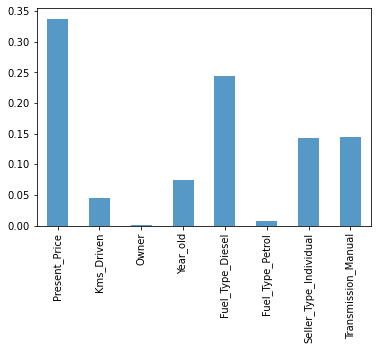

In [24]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90);

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [27]:
model = DecisionTreeRegressor(random_state=2)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2)

In [28]:
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.9675523271325592)

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [30]:
models = {'DT': DecisionTreeRegressor(random_state=2),
          'RF': RandomForestRegressor(n_estimators=150,max_depth = 9,min_samples_leaf = 2,random_state=2),
         'Ada': AdaBoostRegressor()}

In [31]:
for name, model in models.items():
    model.fit(X_train,y_train)
    print(print(name),print("Train_score :",model.score(X_train,y_train)),print("Test_score :",model.score(X_test,y_test)))
    print()

DT
Train_score : 1.0
Test_score : 0.9675523271325592
None None None

RF
Train_score : 0.9717688949982107
Test_score : 0.9542363295664715
None None None

Ada
Train_score : 0.9600385675526769
Test_score : 0.9335871316764389
None None None



# Select Final Model As DecisionTreeRegressor

In [32]:
model = DecisionTreeRegressor(random_state=2)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([ 6.85,  0.4 ,  4.4 ,  7.75, 17.  ,  5.3 ,  3.45,  0.4 ,  3.5 ,
        4.5 ,  2.  ,  0.9 ,  4.9 ,  6.7 ,  7.75, 17.  ,  6.4 ,  4.  ,
        0.45,  1.65,  2.9 ,  4.9 ,  4.5 ,  9.15,  0.2 ,  0.75,  0.1 ,
        0.6 ,  0.45,  4.  ,  2.25,  5.95,  0.45,  8.35,  3.25,  1.2 ,
        5.25,  4.5 ,  0.2 ,  6.25,  7.25, 18.75,  4.9 ,  4.4 ,  5.5 ,
       12.5 ,  0.2 ,  0.75,  5.  ,  6.5 ,  5.35,  3.1 ,  5.  , 23.  ,
        1.11,  1.11,  0.42,  2.9 ,  3.9 ,  3.35,  3.8 ])

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.9675523271325592

In [39]:
input_data = (6.87,42450,0,8,1,0,0,1)

num_array = np.asarray(input_data)

num_array_reshape = num_array.reshape(1,-1)

prediction = model.predict(num_array_reshape)

print(prediction)

[4.6]


In [38]:
import pickle

pickle.dump(model , open('model.pkl','wb'))

Car_prediction = pickle.load(open('model.pkl','rb'))